In [2]:
import pandas as Pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [5]:
#pip install pandas-datareader

In [6]:
#from pandas.io.data import DataReader
from pandas_datareader import data, wb
from datetime import datetime
#from __future__import division


In [7]:
tech_list=['AAPL', 'GOOG', 'MSFT', 'AMZN']
end= datetime.now()
start=datetime(end.year-1, end.month, end.day)
for stock in tech_list:     #grabing Yahoo data and setting as a Data frame
    globals()[stock]= data.DataReader(stock, 'yahoo', start, end) 

In [8]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-29,1632.380005,1590.719971,1631.270020,1593.880005,4632800,1593.880005
2019-01-30,1676.949951,1619.680054,1623.000000,1670.430054,5783800,1670.430054
2019-01-31,1736.410034,1679.079956,1692.849976,1718.729980,10910300,1718.729980
2019-02-01,1673.060059,1622.010010,1638.880005,1626.229980,11506200,1626.229980
2019-02-04,1649.630005,1613.500000,1623.000000,1633.310059,4929100,1633.310059


In [9]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-29,1075.150024,1055.864990,1072.680054,1060.619995,1021800,1060.619995
2019-01-30,1091.000000,1066.849976,1068.430054,1089.060059,1279800,1089.060059
2019-01-31,1117.329956,1095.410034,1103.000000,1116.369995,1538300,1116.369995
2019-02-01,1125.000000,1104.890015,1112.400024,1110.750000,1462200,1110.750000
2019-02-04,1132.800049,1109.020020,1112.660034,1132.800049,2576500,1132.800049


In [10]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-29,158.130005,154.110001,156.250000,154.679993,41587200.0,152.390320
2019-01-30,166.149994,160.229996,163.250000,165.250000,61109800.0,162.803864
2019-01-31,169.000000,164.559998,166.110001,166.440002,40739600.0,163.976242
2019-02-01,168.979996,165.929993,166.960007,166.520004,32668100.0,164.055069
2019-02-04,171.660004,167.279999,167.410004,171.250000,31495500.0,168.715042


In [11]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-29,104.970001,102.169998,104.879997,102.940002,31490500.0,101.440102
2019-01-30,106.379997,104.330002,104.620003,106.379997,49471900.0,104.829979
2019-01-31,105.220001,103.180000,103.800003,104.430000,55636400.0,102.908394
2019-02-01,104.099998,102.349998,103.779999,102.779999,35535700.0,101.282433
2019-02-04,105.800003,102.769997,102.870003,105.739998,31315100.0,104.199295


In [12]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,221.576126,217.892767,219.509723,219.954743,2.771441e+07,218.881180
std,40.449885,40.071015,40.170771,40.491673,9.766479e+06,41.136634
min,158.130005,154.110001,156.250000,154.679993,1.136200e+07,152.390320
25%,194.960007,190.779999,191.660004,192.740005,2.099050e+07,191.435730
50%,207.419998,203.839996,205.789993,205.699997,2.588620e+07,204.968811
75%,246.729996,241.809998,244.759995,243.580002,3.204650e+07,242.850891
max,327.799988,321.380005,324.450012,326.649994,6.928140e+07,326.649994


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-01-29 to 2020-01-29
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


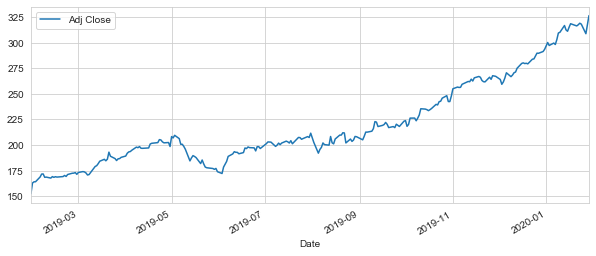

In [14]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

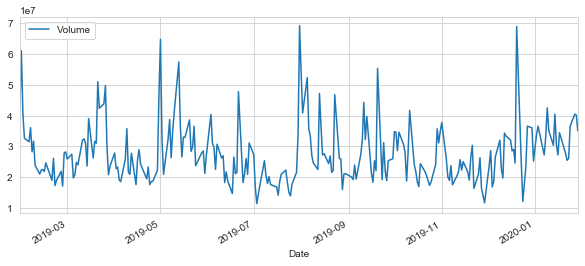

In [15]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [16]:
#moving average calculations for various intervals
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days" % (str(ma))
#AAPL[Column_name]=Pd.rolling_mean(AAPL['Adj Close'], ma)
    AAPL[column_name]=Pd.Series(AAPL['Adj Close']).rolling(window=ma).mean() #pd.Series(timeseries).rolling(window=24).mean()

In [17]:
AAPL[column_name]

Date
2019-01-29           NaN
2019-01-30           NaN
2019-01-31           NaN
2019-02-01           NaN
2019-02-04           NaN
                 ...    
2020-01-23    283.155200
2020-01-24    284.277399
2020-01-27    285.217200
2020-01-28    286.281600
2020-01-29    287.561799
Name: MA for 50 days, Length: 253, dtype: float64

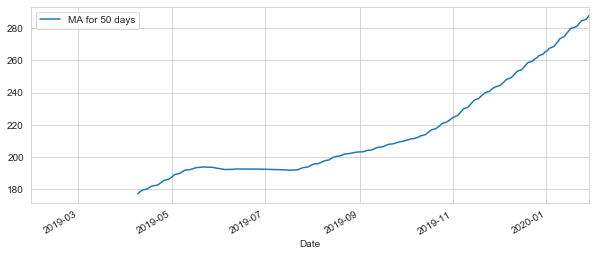

In [18]:
#AAPL['Adj Close'].plot(legend=True, figsize=(10,4))
AAPL[column_name].plot(subplots=False,legend=True, figsize=(10,4))


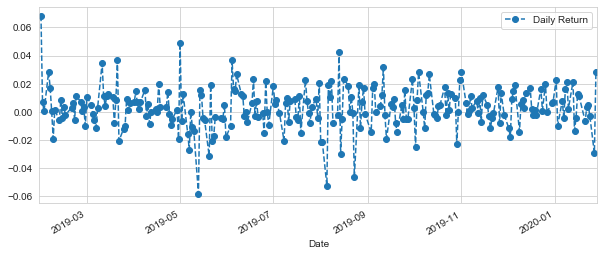

In [19]:
#Daily returns
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

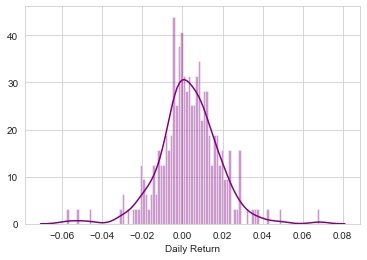

In [20]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

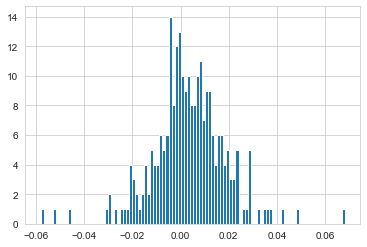

In [21]:
#using pandas histogram
AAPL['Daily Return'].hist(bins=100)

In [22]:
Closing_df=data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']
Closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-29,152.390320,1060.619995,101.440102,1593.880005
2019-01-30,162.803864,1089.060059,104.829979,1670.430054
2019-01-31,163.976242,1116.369995,102.908394,1718.729980
2019-02-01,164.055069,1110.750000,101.282433,1626.229980
2019-02-04,168.715042,1132.800049,104.199295,1633.310059


In [23]:
tech_rets=Closing_df.pct_change()# percent change
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-29,NaN,NaN,NaN,NaN
2019-01-30,0.068335,0.026815,0.033418,0.048027
2019-01-31,0.007201,0.025077,-0.018330,0.028915
2019-02-01,0.000481,-0.005034,-0.015800,-0.053819
2019-02-04,0.028405,0.019851,0.028799,0.004354


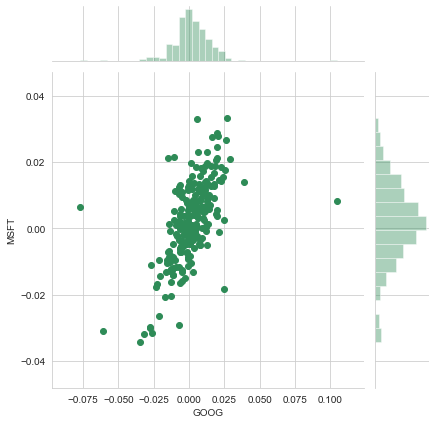

In [24]:
sns.jointplot('GOOG','MSFT', tech_rets, kind='scatter', color='seagreen')

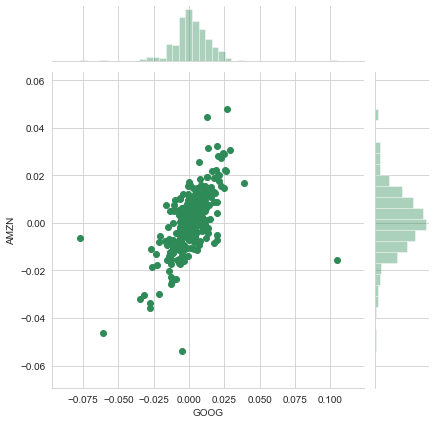

In [25]:
sns.jointplot('GOOG','AMZN', tech_rets, kind='scatter', color='seagreen')

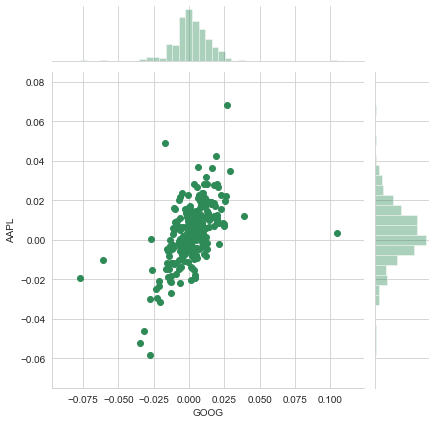

In [26]:
sns.jointplot('GOOG','AAPL', tech_rets, kind='scatter', color='seagreen')

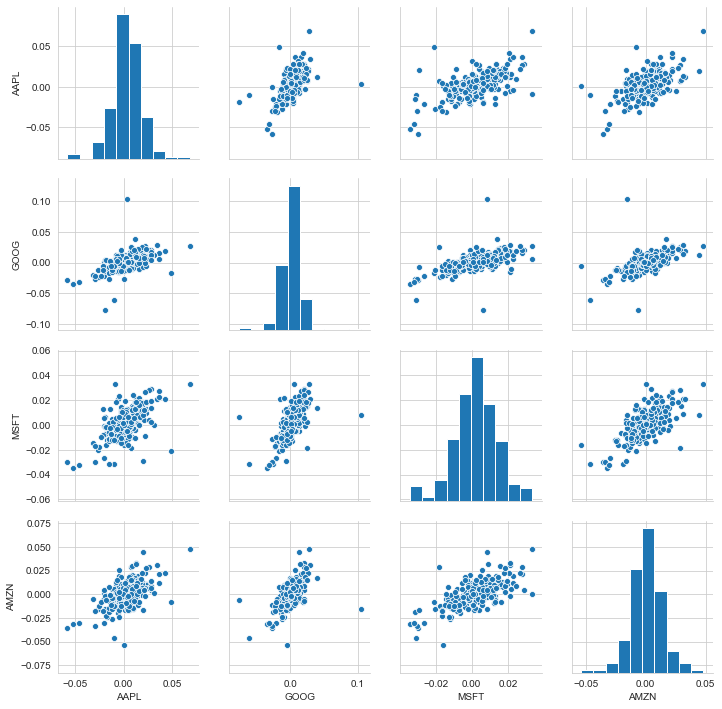

In [27]:
# use sns and pd for comparison
sns.pairplot(tech_rets.dropna())

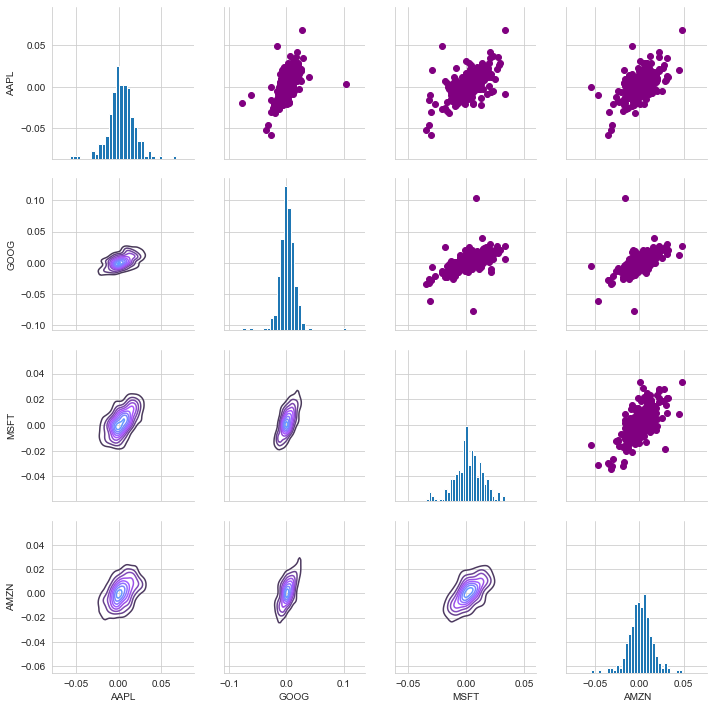

In [28]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

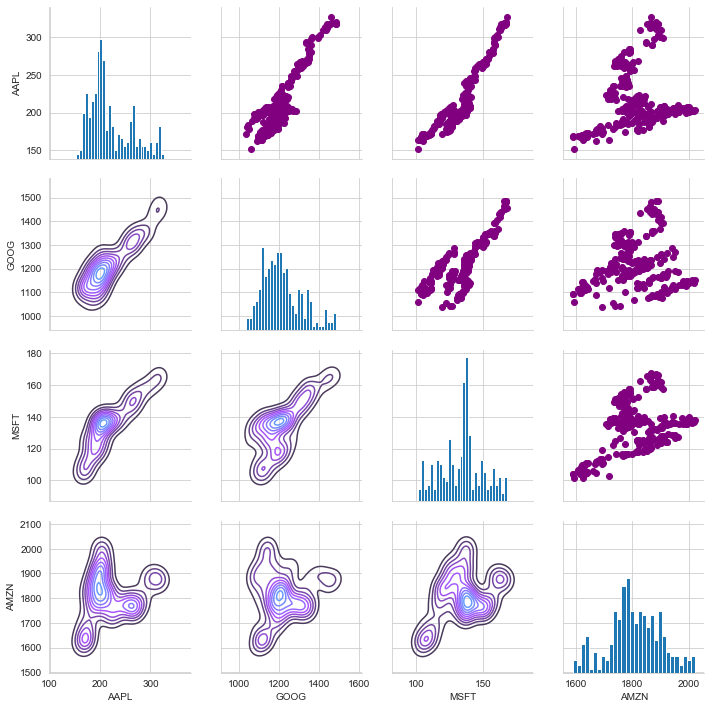

In [29]:
returns_fig=sns.PairGrid(Closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

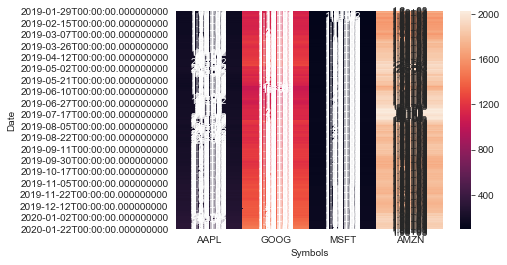

In [36]:
#sns.corrplot(tech_rets.dropna(), annot=True)
#sns.corrplot(Closing_df.dropna(), annot=True)
#sns.heatmap(tech_rets.dropna(), annot=True)
sns.heatmap(Closing_df.dropna(), annot=True)

In [37]:
#from seaborn.linearmodels import corrplot,symmatplot

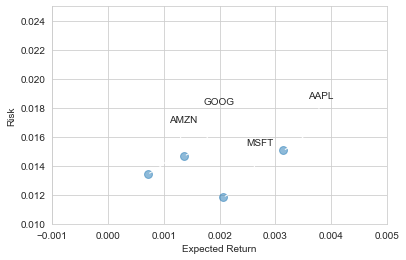

In [57]:
#Risk Analysis> standard deviation of daily returns
rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),  rets.std(), alpha=0.5,s=area)
plt.ylim([0.01, 0.025])
plt.xlim([-0.001,0.005])
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy=(x,y), xytext=(50,50),
    textcoords='offset points', ha='right', va='bottom',
    arrowprops=dict(arrowstyle='-',  connectionstyle='arc3, rad=-0.3'))
    

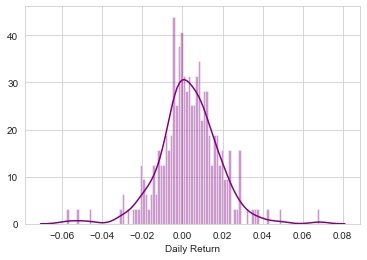

In [63]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')


In [59]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-30,0.068335,0.026815,0.033418,0.048027
2019-01-31,0.007201,0.025077,-0.018330,0.028915
2019-02-01,0.000481,-0.005034,-0.015800,-0.053819
2019-02-04,0.028405,0.019851,0.028799,0.004354
2019-02-05,0.017110,0.011644,0.013997,0.015612


In [69]:
rets['AAPL'].quantile(0.05)

-0.020535694375501234

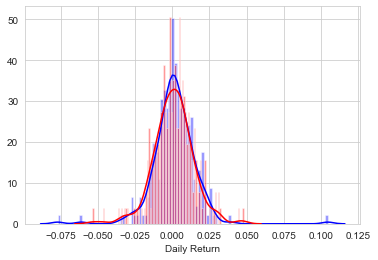

In [75]:
GOOG['Daily Return']=GOOG['Adj Close'].pct_change()
sns.distplot(GOOG['Daily Return'].dropna(), bins=100, color='blue')

AMZN['Daily Return']=AMZN['Adj Close'].pct_change()
sns.distplot(AMZN['Daily Return'].dropna(), bins=100, color='red')


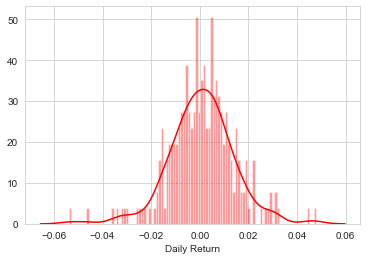

In [74]:
AMZN['Daily Return']=AMZN['Adj Close'].pct_change()
sns.distplot(AMZN['Daily Return'].dropna(), bins=100, color='red')

In [77]:
#Monte Carlo Risk Analysis
mu=rets.mean()['GOOG'] # average daily returns
sigma=rets.std()['GOOG'] # standard deviation

In [84]:
days=365
dt=1/days
def stock_monte_carlo(start_price, days, mu, sigma):
    price=np.zeros(days)#creating empty matrix to hold data
    price[0]=start_price
    shock=np.zeros(days) 
    drift=np.zeros(days)
    for x in range(1, days):
        shock[x]=np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price [x-1]*(drift[x]+shock[x]))
    return price


In [85]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-01-29,1075.150024,1055.864990,1072.680054,1060.619995,1021800,1060.619995,NaN
2019-01-30,1091.000000,1066.849976,1068.430054,1089.060059,1279800,1089.060059,0.026815
2019-01-31,1117.329956,1095.410034,1103.000000,1116.369995,1538300,1116.369995,0.025077
2019-02-01,1125.000000,1104.890015,1112.400024,1110.750000,1462200,1110.750000,-0.005034
2019-02-04,1132.800049,1109.020020,1112.660034,1132.800049,2576500,1132.800049,0.019851


Text(0.5, 1.0, 'Google MonteCarlo risk')

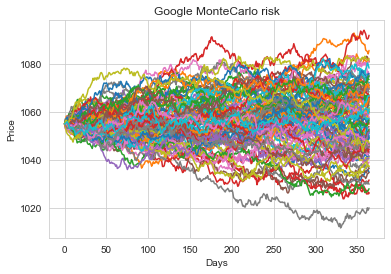

In [86]:
start_price=1055
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Google MonteCarlo risk')

In [89]:
runs=10000
simulations=np.zeros(runs) #creating empty matrix to hold end price data
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1]

In [90]:
 simulations[run]

1079.5136004015258

In [91]:
simulations

array([1082.36967274, 1078.16303707, 1083.93167246, ..., 1031.06170091,
       1045.92096494, 1079.5136004 ])

Text(0.6, 0.8, 'strt_price:$1055.00')

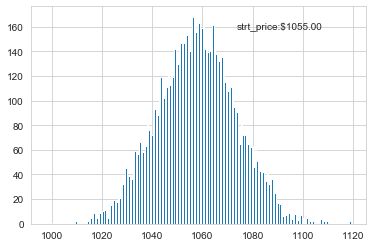

In [92]:
q=np.percentile(simulations, 1)
plt.hist(simulations, bins=200)
plt.figtext(0.6,0.8, s="strt_price:$%.2f"%start_price)

In [94]:
plt.figtext(0.6,0.6, "VaR(0.99):$%.2f"%(start_price-q,)) # variance within 99% confidence interval
plt.figtext(0.15,0.6, "q(0.99):$%.2f"%q) # 1% quantile 

Text(0.15, 0.6, 'q(0.99):$1022.84')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Final price distribution for Google stock after 365 days')

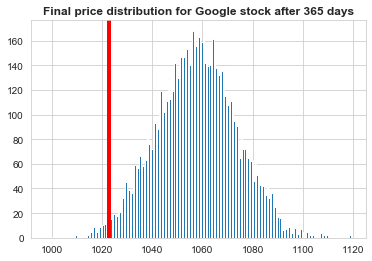

In [97]:
plt.hist(simulations, bins=200)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Google stock after %s days" %days, weight='bold')